# Hypothesis 4
Pull requests are reviewed and merged faster by an integrator from the same affiliation.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kruskal
from cliffs_delta import cliffs_delta

In [29]:
merged_data = pd.read_csv('./data/merged_data.csv', header=0)
merged_data

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,...,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num,log_mergetime_minutes,log_lifetime_minutes
0,35,1142,saltstack,salt,1,4534,4534.0,1,22,0,...,0,0,49.0,1,0.000622,0,4534,0,8.419580,8.419580
1,41,1142,saltstack,salt,1,983,983.0,1,193,0,...,0,0,3.0,0,0.000013,0,983,0,6.891626,6.891626
2,45,853,rapid7,metasploit-framework,1,131,131.0,1,2,0,...,0,0,159.0,0,0.000023,0,131,0,4.882802,4.882802
3,52,22091370,kubernetes,kubernetes,1,627,627.0,1,8,19,...,0,0,0.0,0,0.000459,0,627,0,6.442540,6.442540
4,60,22091370,kubernetes,kubernetes,1,2760,2760.0,1,10,75,...,3,0,0.0,1,0.021057,0,2760,0,7.923348,7.923348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93368,3347524,1486,ansible,ansible,1,100,100.0,1,4,0,...,0,0,3.0,0,0.010687,0,100,0,4.615121,4.615121
93369,3347645,1486,ansible,ansible,1,487,487.0,2,8,0,...,0,0,67.0,0,0.008142,0,487,0,6.190315,6.190315
93370,3347815,48212908,pandas-dev,pandas,1,63531,63531.0,215,9804,13464,...,17,3,7.0,0,0.000274,1,10204,1,11.059299,11.059299
93371,3347882,20078281,nodejs,node,1,11373,11373.0,4,16,0,...,0,0,197.0,0,0.012812,0,11373,0,9.339085,9.339085


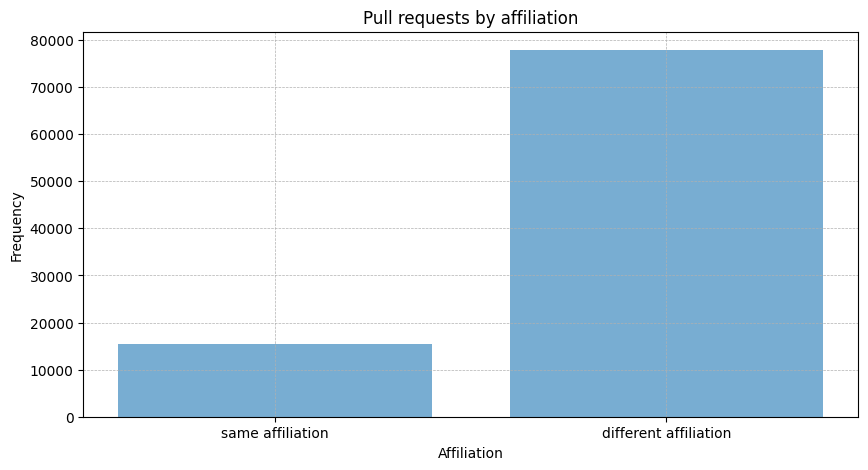

In [30]:
same_affiliation = merged_data[merged_data['contrib_affiliation'] == merged_data['inte_affiliation']]
diff_affiliation = merged_data[merged_data['contrib_affiliation'] != merged_data['inte_affiliation']]

plt.figure(figsize=(10, 5))
plt.bar(['same affiliation', 'different affiliation'], [len(same_affiliation), len(diff_affiliation)], alpha=0.6)
plt.xlabel('Affiliation')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Pull requests by affiliation')
plt.show()

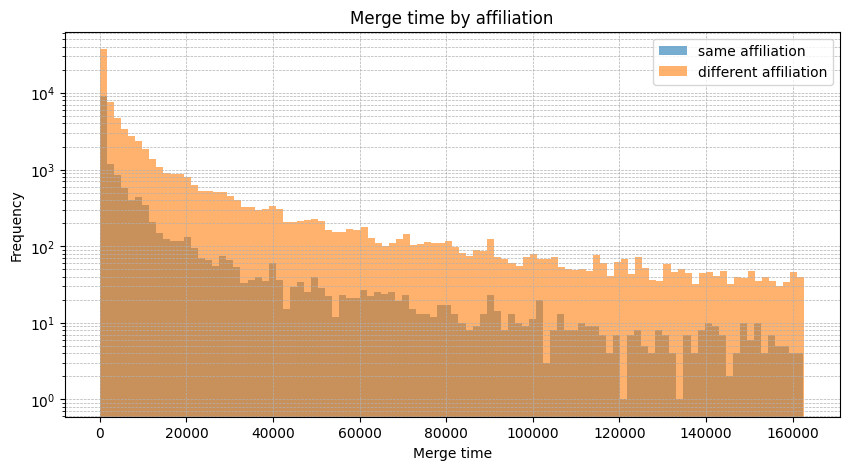

In [31]:

plt.figure(figsize=(10, 5))
plt.hist(same_affiliation['mergetime_minutes'], bins=100, alpha=0.6, label='same affiliation', log=True)
plt.hist(diff_affiliation['mergetime_minutes'], bins=100, alpha=0.6, label='different affiliation', log=True)
plt.xlabel('Merge time')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Merge time by affiliation')
plt.show()

In [32]:

sample_size = 5000
same_sample = same_affiliation['mergetime_minutes'].sample(n=sample_size, random_state=1)
diff_sample = diff_affiliation['mergetime_minutes'].sample(n=sample_size, random_state=1)

res_same = shapiro(same_sample)
res_diff = shapiro(diff_sample)
print('Shapiro-Wilk test for same affiliation, mergetime: W = {}, p = {}'.format(res_same.statistic, res_same.pvalue))
print('Shapiro-Wilk test for different affiliation, mergetime: W = {}, p = {}'.format(res_diff.statistic, res_diff.pvalue))

H, p = kruskal(same_affiliation['mergetime_minutes'], diff_affiliation['mergetime_minutes'])
print('Kruskal-Wallis H test, mergetime: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(same_affiliation['mergetime_minutes'], diff_affiliation['mergetime_minutes'])
    print('Cliff\'s delta for mergetime: delta = {}, interpretation = {}'.format(delta, res))
      
print('Mean merge time for same affiliation: {}'.format(same_affiliation['mergetime_minutes'].mean()))
print('Mean merge time for different affiliation: {}'.format(diff_affiliation['mergetime_minutes'].mean()))
print('Median merge time for same affiliation: {}'.format(same_affiliation['mergetime_minutes'].median()))
print('Median merge time for different affiliation: {}'.format(diff_affiliation['mergetime_minutes'].median()))
print('Standard deviation of merge time for same affiliation: {}'.format(same_affiliation['mergetime_minutes'].std()))
print('Standard deviation of merge time for different affiliation: {}'.format(diff_affiliation['mergetime_minutes'].std()))
print('Maximum merge time for same affiliation: {}'.format(same_affiliation['mergetime_minutes'].max()))
print('Maximum merge time for different affiliation: {}'.format(diff_affiliation['mergetime_minutes'].max()))
print('Minimum merge time for same affiliation: {}'.format(same_affiliation['mergetime_minutes'].min()))
print('Minimum merge time for different affiliation: {}'.format(diff_affiliation['mergetime_minutes'].min()))

Shapiro-Wilk test for same affiliation, mergetime: W = 0.4530539983527778, p = 4.216614271471113e-82
Shapiro-Wilk test for different affiliation, mergetime: W = 0.5133877011092051, p = 1.455708894642318e-79
Kruskal-Wallis H test, mergetime: H = 912.4945632948851, p = 1.886572375121312e-200
Cliff's delta for mergetime: delta = -0.15331471246166944, interpretation = small
Mean merge time for same affiliation: 8764.721842783505
Mean merge time for different affiliation: 11948.793495433702
Median merge time for same affiliation: 1148.0
Median merge time for different affiliation: 1891.0
Standard deviation of merge time for same affiliation: 21609.4359383868
Standard deviation of merge time for different affiliation: 24892.32202623263
Maximum merge time for same affiliation: 162415.0
Maximum merge time for different affiliation: 162737.0
Minimum merge time for same affiliation: 16.0
Minimum merge time for different affiliation: 16.0


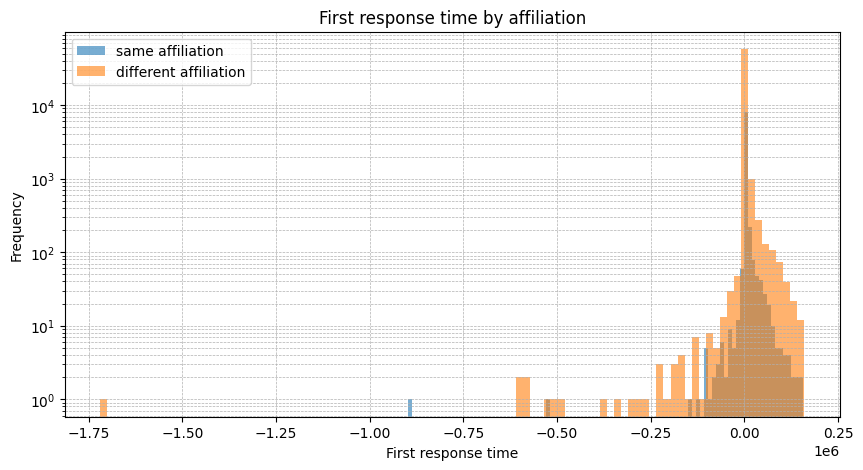

Shapiro-Wilk test for same affiliation, first response: W = 0.21909409960132564, p = 4.3750099181358195e-90
Shapiro-Wilk test for different affiliation, first response: W = 0.10329882013402036, p = 2.7480616052792364e-93
Kruskal-Wallis H test, first response: H = 813.6257670457442, p = 5.883084508358577e-179
Cliff's delta for first response: delta = 0.18757607867436815, interpretation = small
Mean first response time for same affiliation: 1606.9819986152781
Mean first response time for different affiliation: 1096.0790541792276
Median first response time for same affiliation: 29.0
Median first response time for different affiliation: 9.0
Standard deviation of first response time for same affiliation: 15184.225867577134
Standard deviation of first response time for different affiliation: 12873.569119731555
Maximum first response time for same affiliation: 155744.0
Maximum first response time for different affiliation: 159948.0


In [33]:

plt.figure(figsize=(10, 5))
plt.hist(same_affiliation['first_response_time'], bins=100, alpha=0.6, label='same affiliation', log=True)
plt.hist(diff_affiliation['first_response_time'], bins=100, alpha=0.6, label='different affiliation', log=True)
plt.xlabel('First response time')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('First response time by affiliation')
plt.show()

same_sample = same_affiliation['first_response_time'].dropna().sample(n=5000, random_state=1)
diff_sample = diff_affiliation['first_response_time'].dropna().sample(n=5000,random_state=1)

res_same = shapiro(same_sample)
res_diff = shapiro(diff_sample)
print('Shapiro-Wilk test for same affiliation, first response: W = {}, p = {}'.format(res_same.statistic, res_same.pvalue))
print('Shapiro-Wilk test for different affiliation, first response: W = {}, p = {}'.format(res_diff.statistic, res_diff.pvalue))

H, p = kruskal(same_affiliation['first_response_time'].dropna(), diff_affiliation['first_response_time'].dropna())
print('Kruskal-Wallis H test, first response: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(same_affiliation['first_response_time'].dropna(), diff_affiliation['first_response_time'].dropna())   
    print('Cliff\'s delta for first response: delta = {}, interpretation = {}'.format(delta, res))

print('Mean first response time for same affiliation: {}'.format(same_affiliation['first_response_time'].mean()))
print('Mean first response time for different affiliation: {}'.format(diff_affiliation['first_response_time'].mean()))
print('Median first response time for same affiliation: {}'.format(same_affiliation['first_response_time'].median()))
print('Median first response time for different affiliation: {}'.format(diff_affiliation['first_response_time'].median()))
print('Standard deviation of first response time for same affiliation: {}'.format(same_affiliation['first_response_time'].std()))
print('Standard deviation of first response time for different affiliation: {}'.format(diff_affiliation['first_response_time'].std()))
print('Maximum first response time for same affiliation: {}'.format(same_affiliation['first_response_time'].max()))
print('Maximum first response time for different affiliation: {}'.format(diff_affiliation['first_response_time'].max()))

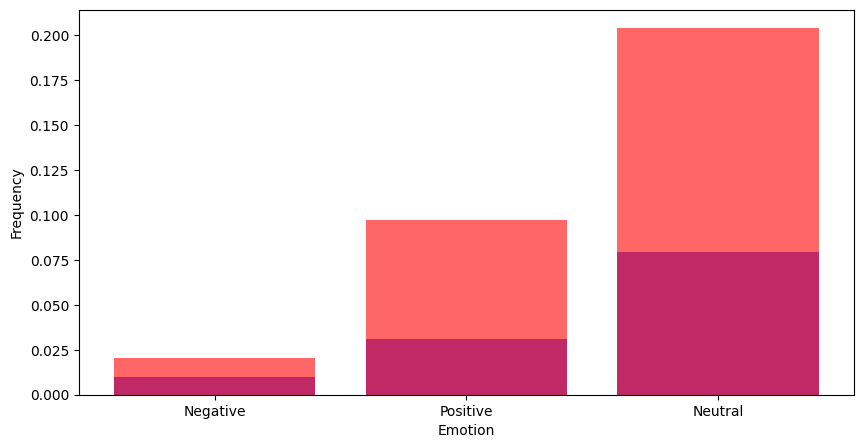

Shapiro-Wilk test for same country, negative emotion integrator: W = 0.09712175976157289, p = 1.8991662477931062e-93
Shapiro-Wilk test for same county, positive emotion integrator: W = 0.1928404288065173, p = 7.593146137450896e-91
Shapiro-Wilk test for same country, neutral emotion integrator: W = 0.32823624719265054, p = 1.1546773522677442e-86
Shapiro-Wilk test for different country, negative emotion integrator: W = 0.18884942922833392, p = 5.843803841043482e-91
Shapiro-Wilk test for different country, positive emotion integrator: W = 0.41103560430868313, p = 9.922959653270422e-84
Shapiro-Wilk test for different country, neutral emotion integrator: W = 0.5455243970826934, p = 4.2448192340374574e-78
Kruskal-Wallis H test, negative emotion integrator: H = 292.9316454292534, p = 1.1423210738832049e-65
Cliff's delta: -0.032052711377418434, interpretation: negligible
Kruskal-Wallis H test, positive emotion integrator: H = 1225.3687301670227, p = 1.8707427092089318e-268
Cliff's delta: -0.10

In [34]:
# emotion
neg_same = same_affiliation['perc_inte_neg_emo'].dropna()
pos_same = same_affiliation['perc_inte_pos_emo'].dropna()
neu_same = same_affiliation['perc_inte_neu_emo'].dropna()

neg_diff = diff_affiliation['perc_inte_neg_emo'].dropna()
pos_diff = diff_affiliation['perc_inte_pos_emo'].dropna()
neu_diff = diff_affiliation['perc_inte_neu_emo'].dropna()


plt.figure(figsize=(10, 5))
plt.bar(['Negative', 'Positive', 'Neutral'], [neg_same.mean(), pos_same.mean(), neu_same.mean()], alpha=0.6, color='blue')
plt.bar(['Negative', 'Positive', 'Neutral'], [neg_diff.mean(), pos_diff.mean(), neu_diff.mean()], alpha=0.6, color='red')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.show()

sample_size = 5000
same_sample_neg = neg_same.sample(n=sample_size, random_state=1)
same_sample_pos = pos_same.sample(n=sample_size, random_state=1)
same_sample_neu = neu_same.sample(n=sample_size, random_state=1)

diff_sample_neg = neg_diff.sample(n=sample_size, random_state=1)
diff_sample_pos = pos_diff.sample(n=sample_size, random_state=1)
diff_sample_neu = neu_diff.sample(n=sample_size, random_state=1)

res_same_neg = shapiro(same_sample_neg)
res_same_pos = shapiro(same_sample_pos)
res_same_neu = shapiro(same_sample_neu)

print('Shapiro-Wilk test for same country, negative emotion integrator: W = {}, p = {}'.format(res_same_neg.statistic, res_same_neg.pvalue))
print('Shapiro-Wilk test for same county, positive emotion integrator: W = {}, p = {}'.format(res_same_pos.statistic, res_same_pos.pvalue))
print('Shapiro-Wilk test for same country, neutral emotion integrator: W = {}, p = {}'.format(res_same_neu.statistic, res_same_neu.pvalue))

res_diff_neg = shapiro(diff_sample_neg)
res_diff_pos = shapiro(diff_sample_pos)
res_diff_neu = shapiro(diff_sample_neu)

print('Shapiro-Wilk test for different country, negative emotion integrator: W = {}, p = {}'.format(res_diff_neg.statistic, res_diff_neg.pvalue))
print('Shapiro-Wilk test for different country, positive emotion integrator: W = {}, p = {}'.format(res_diff_pos.statistic, res_diff_pos.pvalue))
print('Shapiro-Wilk test for different country, neutral emotion integrator: W = {}, p = {}'.format(res_diff_neu.statistic, res_diff_neu.pvalue))

H, p = kruskal(neg_same, neg_diff)
print('Kruskal-Wallis H test, negative emotion integrator: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(neg_same, neg_diff)
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))

H, p = kruskal(pos_same, pos_diff)
print('Kruskal-Wallis H test, positive emotion integrator: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(pos_same, pos_diff)
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))

H, p = kruskal(neu_same, neu_diff)
print('Kruskal-Wallis H test, neutral emotion integrator: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(neu_same, neu_diff)
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))